In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [252]:
titanic_ts = pd.read_csv(r'C:\Users\Liv\Documents\Python Scripts\titanic_test.csv')
titanic_ts.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [253]:
titanic_ts.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [254]:
titanic_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [255]:
titanic_ts.isnull().sum() # 결측치 개수 찾기 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

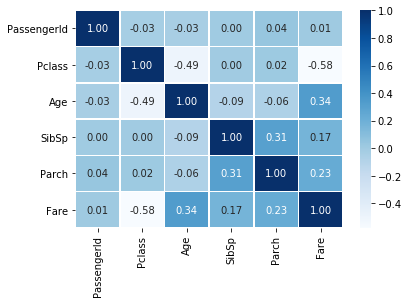

In [256]:
sns.heatmap(data = titanic_ts.corr(), annot = True, fmt = '.2f', linewidths=.5, cmap='Blues') # 수치형 변수들 간 상관관계 히트맵
# >>> Fare와 Pclass에서 비교적 높은 음의 상관관계 발견. 이후 Fare의 결측치 처리에서 이용

### 나이 (Age) - 결측치 처리

In [257]:
titanic_ts['Age'].value_counts()

24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64

In [258]:
titanic_ts['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

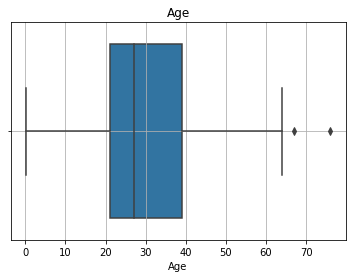

In [259]:
sns.boxplot(titanic_ts['Age'])
plt.title('Age')
plt.grid()
# >>> outliers는 처리 안함 (나이가 0 ~ 76세까지 분포하므로 적절한 데이터라고 판단)

In [260]:
titanic_ts['Age'].isnull().sum() # 결측치 86개 

86

In [261]:
titanic_ts['Age'].fillna(titanic_ts['Age'].mean(), inplace = True) # 평균으로 결측치 채워넣기 

In [262]:
titanic_ts['Age'].isnull().sum() # 결측치 처리됨

0

In [263]:
titanic_ts['Age'].describe() # 결측치 처리된 데이터 상태 확인

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

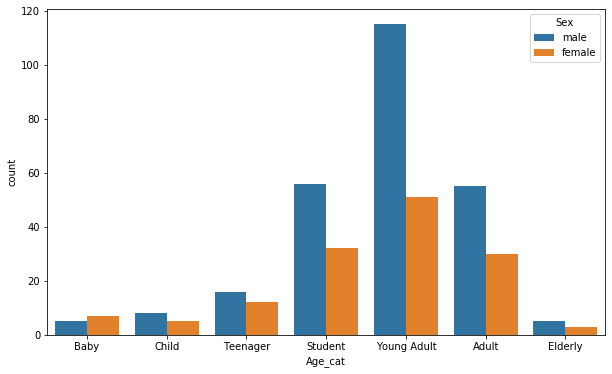

In [264]:
# 교재 참고 : 나이를 구간별로 나눠서 시각화
def get_category(age):
    cat = ''
    if age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_ts['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.countplot(x = 'Age_cat', hue = 'Sex', data = titanic_ts, order = group_names)
titanic_ts.drop('Age_cat', axis = 1, inplace = True)

### 요금 (Fare) - 결측치, 이상치 처리

In [265]:
titanic_ts['Fare'].value_counts()

7.7500     21
26.0000    19
8.0500     17
13.0000    17
7.8958     11
           ..
9.3250      1
14.4583     1
15.0333     1
25.4667     1
21.0750     1
Name: Fare, Length: 169, dtype: int64

In [266]:
titanic_ts['Fare'].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [267]:
print(titanic_ts[['Pclass', 'Fare']].groupby(['Pclass'], as_index=False).mean()) # Pclass에 따른 Fare의 평균 구함
print("")

   Pclass       Fare
0       1  94.280297
1       2  22.202104
2       3  12.459678



In [268]:
print(titanic_ts[titanic_ts["Fare"].isnull()]["Pclass"]) # Fare에 결측치가 있는 행의 Pclass 출력 >>> 3임.

152    3
Name: Pclass, dtype: int64


In [269]:
# Fare 결측치는 Pclass 3의 평균 Fare 값으로 대체 <- Pclass와 Fare의 연관이 크다고 판단.
titanic_ts['Fare'] = titanic_ts['Fare'].fillna(12.459678) 

In [270]:
titanic_ts['Age'].isnull().sum() # 결측치 처리됨

0

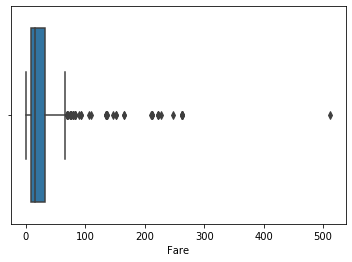

In [271]:
sns.boxplot(titanic_ts['Fare']) # 이상치 감지를 위해 Boxplot 그리기

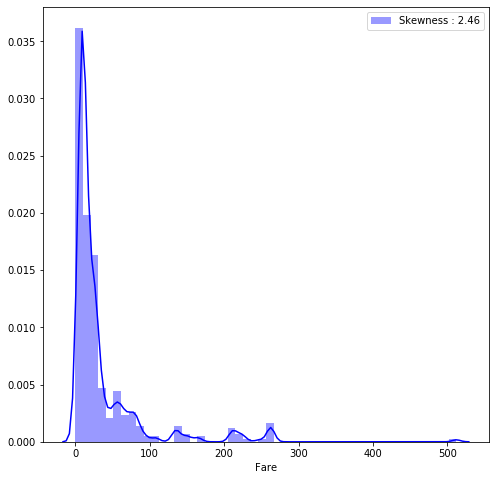

In [272]:
# 이상치 처리 이전의 Fare 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(titanic_ts['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [273]:
# Outlier 정한 기준: -+3 * 표준편차
fare_mean = titanic_ts['Fare'].mean()
fare_std = titanic_ts['Fare'].std()
indexNames = titanic_ts[titanic_ts['Fare'] < fare_mean - 3*fare_std].index
titanic_ts.drop(indexNames , inplace=True)
indexNames = titanic_ts[titanic_ts['Fare'] > fare_mean + 3*fare_std].index
titanic_ts.drop(indexNames , inplace=True)

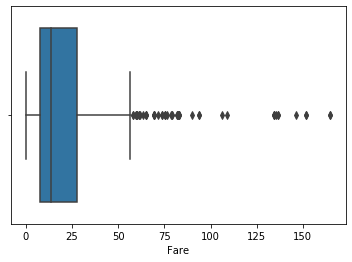

In [274]:
sns.boxplot(titanic_ts['Fare']) # 이상치 처리 완료

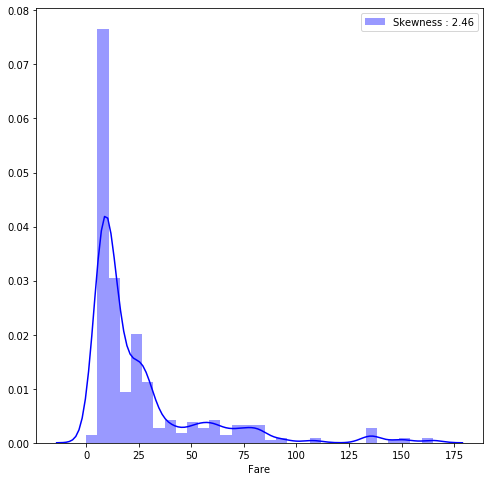

In [275]:
# 이상치 처리 완료된 후의 Fare 히스토그램
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(titanic_ts['Fare'], color='b', label='Skewness : {:.2f}'.format(titanic_df['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

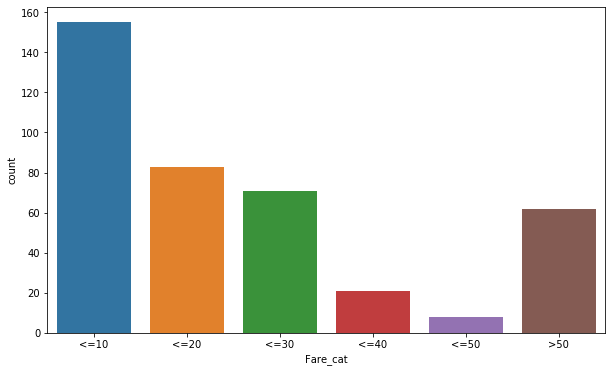

In [276]:
# Fare를 임의로 10단위로 나눈 후의 시각화

def get_category(fare):
    cat = ''
    if fare <= 10: cat = '<=10'
    elif fare <= 20: cat = '<=20'
    elif fare <= 30: cat = '<=30'
    elif fare <= 40: cat = '<=40'
    elif fare <= 50: cat = '<=50'
    else: cat = '>50'
        
    return cat

plt.figure(figsize=(10, 6))

group_names = ['<=10', '<=20', '<=30', '<=40', '<=50', '>50']

titanic_ts['Fare_cat'] = titanic_ts['Fare'].apply(lambda x : get_category(x))
sns.countplot(x = 'Fare_cat', data = titanic_ts, order = group_names)
titanic_ts.drop('Fare_cat', axis = 1, inplace = True)

### 캐빈 (Cabin) - 결측치 처리

In [277]:
titanic_ts['Cabin'].value_counts()

C31      2
C89      2
C116     2
A34      2
C101     2
        ..
F E46    1
D21      1
B69      1
F        1
F E57    1
Name: Cabin, Length: 65, dtype: int64

In [278]:
titanic_ts['Cabin'].describe()

count      75
unique     65
top       C31
freq        2
Name: Cabin, dtype: object

In [279]:
titanic_ts = titanic_ts.drop('Cabin', axis = 1) # 결측치가 많아 유용한 변수가 아니라고 판단. Cabin 변수 삭제

In [280]:
titanic_ts.isnull().sum() # 결측치 처리 이후의 데이터 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 지위 (PClass)

In [281]:
titanic_ts['Pclass'].value_counts()

3    218
2     93
1     89
Name: Pclass, dtype: int64

In [282]:
# 파이 차트 그리는 함수 생성

def pie_chart(feature):
    feature_ratio = titanic_ts[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature)
    plt.show()

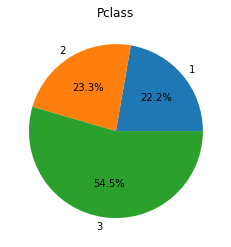

In [283]:
pie_chart('Pclass')

### 이름 (Name)

In [284]:
titanic_ts['Prefix'] = titanic_ts['Name'].str.extract('([A-Za-z]+)\.', expand = False) # 이름에서 prefix만 추출하기

In [285]:
titanic_ts['Prefix'].value_counts()

Mr        236
Miss       72
Mrs        66
Master     20
Rev         2
Ms          1
Dr          1
Col         1
Dona        1
Name: Prefix, dtype: int64

In [286]:
titanic_ts['Prefix'].describe() 

count     400
unique      9
top        Mr
freq      236
Name: Prefix, dtype: object

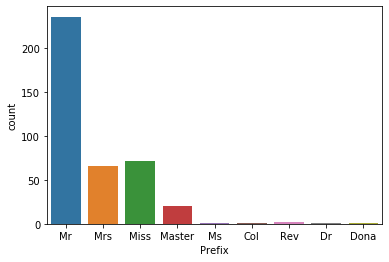

In [287]:
sns.countplot(titanic_ts['Prefix']) # >>> Mr, Mrs, Miss, Master로 분류해서 지표로 이용 가능 ?

### 성별 (Sex)

In [288]:
titanic_ts['Sex'].value_counts()

male      260
female    140
Name: Sex, dtype: int64

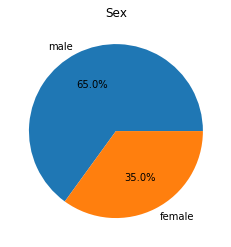

In [289]:
pie_chart('Sex')

### 가족 동반객 수 (SibSp, Parch)

In [290]:
titanic_ts['SibSp'].value_counts() # Siblings & Spouse 

0    276
1    101
2     13
4      4
3      3
8      2
5      1
Name: SibSp, dtype: int64

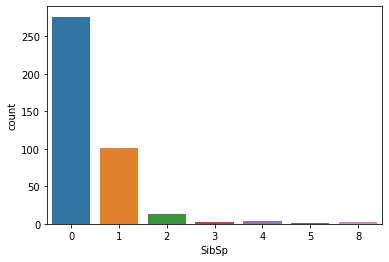

In [291]:
sns.countplot(x = 'SibSp', data = titanic_ts)

In [292]:
titanic_ts['Parch'].value_counts() # Parents & Children

0    315
1     48
2     31
9      2
6      1
5      1
4      1
3      1
Name: Parch, dtype: int64

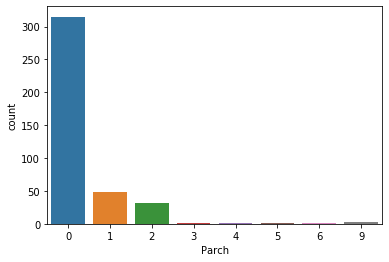

In [293]:
sns.countplot(x = 'Parch', data = titanic_ts)

In [294]:
# Parch와 SibSp를 묶어서 Family로 처리한 후 새로운 변수를 생성
titanic_ts['Family'] = titanic_ts["Parch"] + titanic_ts["SibSp"]
titanic_ts['Family'] = titanic_ts['Family'].astype(int)

In [295]:
titanic_ts['Family'].value_counts()

0     247
1      70
2      54
3      14
10      4
6       4
4       4
7       2
5       1
Name: Family, dtype: int64

In [296]:
titanic_ts['Family'].describe()

count    400.000000
mean       0.797500
std        1.492334
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Family, dtype: float64

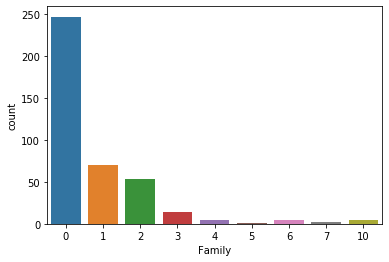

In [297]:
sns.countplot(x = 'Family', data = titanic_ts)

### 티켓 (Ticket)

In [298]:
titanic_ts['Ticket'].describe() # >>> unique value가 너무 많아서 유용한 변수가 아니라고 판단

count          400
unique         355
top       CA. 2343
freq             4
Name: Ticket, dtype: object

### 선착장 (Embarked)

In [299]:
titanic_ts['Embarked'].value_counts()

S    264
C     90
Q     46
Name: Embarked, dtype: int64

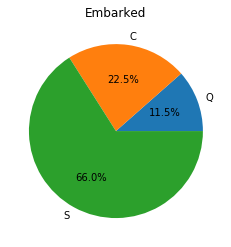

In [300]:
pie_chart('Embarked')